In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy

os.chdir(  "/Users/etmu9498/research/code/scripts/plotting")
import rmw_inner_outer_stats as stats
os.chdir(  "/Users/etmu9498/research/code/scripts/")
import helper_fns


In [44]:
heights, inner, outer = stats.plot_all(tc='all', test_type='return')

# find heights above 50m for every case, after running script above
cliph = []
clipinner = []
clipouter = []
for i in range( 4):    
    only_cloud_heights = np.array( heights[i]) [ np.where( np.array( heights[ i]) > .05)[0] ]
    cliph.append( only_cloud_heights)

    only_inner = np.array( inner[i]) [ np.where( np.array( inner[ i]) > .05)[0] ]
    clipinner.append( only_inner)

    only_outer = np.array( outer[i]) [ np.where( np.array( outer[ i]) > .05)[0] ]
    clipouter.append( only_outer)

print( len( heights))
print( len( inner))
print( len( outer))

# print( heights)
# print( heights[0])

print( len( cliph[0]))
# print( cliph)
print( cliph[0])

#print( len( inner[0]))
#print( len( outer[0]))


TC Fred
Number of crl files: 7


TC Grace
Number of crl files: 11


TC Henri
Number of crl files: 5


TC Ida
Number of crl files: 5


TC Sam
Number of crl files: 7

4
4
4
1446
[2.27157 1.94588 1.92359 ... 3.13077 3.22743 3.22185]


In [94]:
# find local max values in the cloud height distributions for each intensity- plot them on the violin plots below!
from scipy.signal import find_peaks



# do this for every intensity
peak_inds = []
peak_heights_low = []
peak_heights_high = []

for i in range( len( cliph)):

    # bin and smooth data first

    # calculate mean height variation within the bin range
    mean_height=[]
    mean_height_count=[]
    mean_height_prob = []

    width= .1
    smoothwidth=4
    height_bin=np.arange(0, 4.51, width)

    # do this for every height level determined by the manually inputed bin width
    for newi in height_bin:

        # find the points that fall within this height bin for this step
        res=np.where(np.logical_and( cliph[i] >= newi - width / 2., cliph[i] <= newi + width / 2. ))

        mean_height.append( np.mean( cliph[i] [ res]))
        mean_height_count.append( len( res[0]))
        
        # use height to include heights below 50m in caclulations
        # this line accounts for clear air fraction when scaling the curves!
        mean_height_prob.append( len( res[0] ) / len( heights[i]))

    # smooth data before plotting to eliminate noise
    box_pts = smoothwidth
    box = np.ones(box_pts)/box_pts
    prob_smooth = np.convolve( mean_height_prob, box, mode='same')

    
    out = find_peaks( prob_smooth, prominence=.005)
    
    peak_inds.append( out[0])
    peak_heights_low.append( height_bin[ np.array(out)[0]] [0] )
    peak_heights_high.append( height_bin[ np.array(out)[0]] [1])

    
    
print( peak_inds)
print( peak_heights_low)
print( peak_heights_high)

[array([13, 31], dtype=int64), array([ 8, 15], dtype=int64), array([ 8, 19], dtype=int64), array([ 8, 19], dtype=int64)]
[1.3, 0.8, 0.8, 0.8]
[3.1, 1.5, 1.9000000000000001, 1.9000000000000001]


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_8720\3112665540.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_heights_low.append( height_bin[ np.array(out)[0]] [0] )
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_8720\3112665540.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_heights_high.append( height_bin[ np.array(out)[0]] [1])


{'bodies': [<matplotlib.collections.PolyCollection object at 0x000002B412E39670>, <matplotlib.collections.PolyCollection object at 0x000002B412E39A30>, <matplotlib.collections.PolyCollection object at 0x000002B412E39DF0>, <matplotlib.collections.PolyCollection object at 0x000002B412E301F0>], 'cmaxes': <matplotlib.collections.LineCollection object at 0x000002B412E395B0>, 'cmins': <matplotlib.collections.LineCollection object at 0x000002B412E30940>, 'cbars': <matplotlib.collections.LineCollection object at 0x000002B412E30D90>}


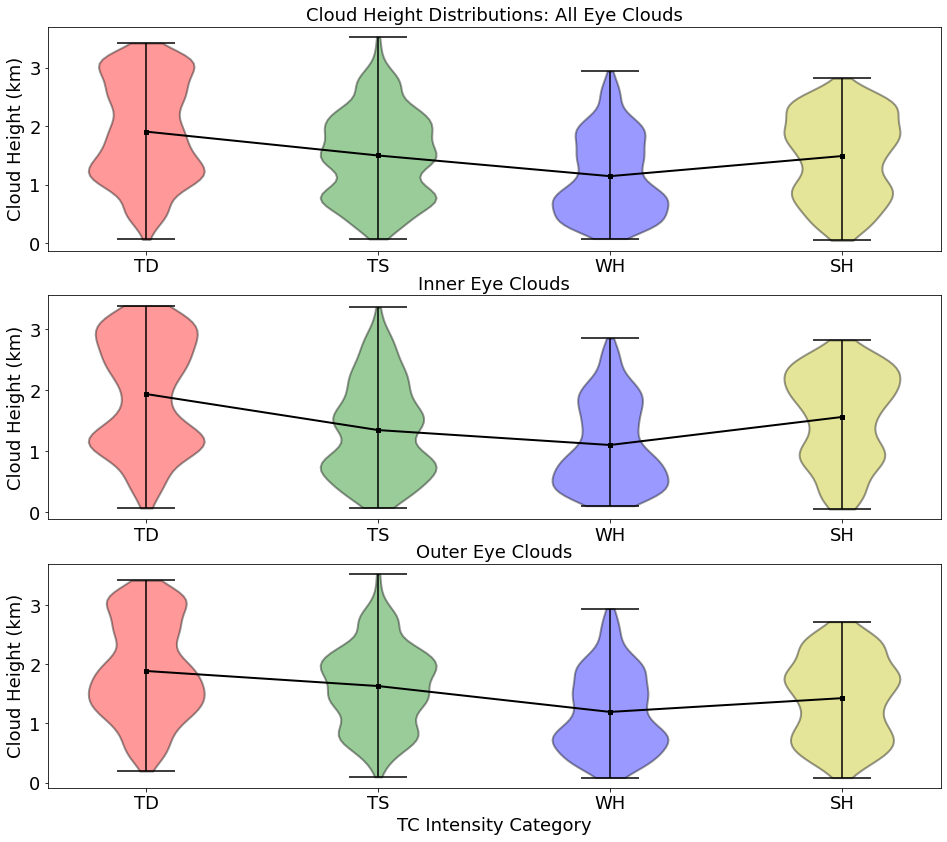

In [100]:
# make a simple violin plot for each distribution!

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16, 14), sharex=False)
helper_fns.change_font_sizes(18, 18)

names = ["TD", "TS", "WH", "SH"]
palette = ['r', 'g', 'b', 'y']


ax1.set_ylabel( "Cloud Height (km)")
ax1.set_title( "Cloud Height Distributions: All Eye Clouds")

    
ax2.set_ylabel( "Cloud Height (km)")
ax2.set_title( "Inner Eye Clouds")
    
    
ax3.set_xlabel( "TC Intensity Category")
ax3.set_ylabel( "Cloud Height (km)")
ax3.set_title( "Outer Eye Clouds")


for ax, data in zip( [ax1, ax2, ax3], (cliph, clipinner, clipouter) ):
    
    parts = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=True, points = 50)
    i = 0
    for pc in parts['bodies']:
        pc.set_facecolor( palette[ i])
        pc.set_edgecolor('black')
        pc.set_alpha(.4)
        pc.set_linewidth(2)
        i += 1

    mins, maxs, bars = parts['cmins'], parts['cmaxes'], parts['cbars'] 
    mins.set_linewidth=2
    mins.set_edgecolor('k')
    maxs.set_linewidth=2
    maxs.set_edgecolor('k')
    bars.set_linewidth=2
    bars.set_edgecolor('k')
        
    # set axis labels
    ax.set_xticks(np.arange(1, len( names) + 1))
    ax.set_xticklabels(names)

print( parts)



# add scatter points and lines showing the location of max points! 
# ax1.scatter( [1, 2, 3, 4], peak_heights_low, s=20, c='k', marker='s')
# ax1.plot( [1, 2, 3, 4], peak_heights_low, linewidth=2, c='k')

# ax1.scatter( [1, 2, 3, 4], peak_heights_high, s=20, c='k', marker='s')
# ax1.plot( [1, 2, 3, 4], peak_heights_high, linewidth=2, c='k')


# add scatter points and lines showing mean heights!
means = []
for i in range( 4):
    means.append( np.nanmean( cliph[i] ))
      
ax1.scatter( [1, 2, 3, 4], means, s=20, c='k', marker='s')
ax1.plot( [1, 2, 3, 4], means, linewidth=2, c='k')


# repeat for inner and outer clouds
means = []
for i in range( 4):
    means.append( np.nanmean( clipinner[i] ))   
ax2.scatter( [1, 2, 3, 4], means, s=20, c='k', marker='s')
ax2.plot( [1, 2, 3, 4], means, linewidth=2, c='k')

means = []
for i in range( 4):
    means.append( np.nanmean( clipouter[i] ))   
ax3.scatter( [1, 2, 3, 4], means, s=20, c='k', marker='s')
ax3.plot( [1, 2, 3, 4], means, linewidth=2, c='k')
